In [ ]:
#Elham Sadeghi March2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#df_com = pd.read_excel("G.N.xlsx")
df_com = pd.read_csv("seq_with_dis.csv")
df_com = df_com[df_com['Peak NIR WAV'].notnull()]
#df_com = df_com[(df_com['Peak 1 b WAV'] < 590)]# & (df_com['Peak 1 b WAV'] < 660)  ]
sequences = df_com['Sequence']

In [3]:
all_count = {"A":np.zeros((10,)), "C":np.zeros((10,)),"T":np.zeros((10,)),"G":np.zeros((10,))}

for i in range(df_com.shape[0]):

  z = list(sequences.iloc[i].strip(""))
  com_value = df_com.iloc[i,:]
  for j in range(1,11):

    for k in range(len(com_value)):
      temp = all_count[z[j-1]]
      temp[j-1]= temp[j-1]+1
      all_count[z[j-1]] = temp

In [4]:
print(max(all_count['A']))
print(max(all_count['C']))
print(max(all_count['G']))
print(max(all_count['T']))
maximum= max(max(all_count['A']),max(all_count['C']),max(all_count['G']),max(all_count['T']))
print(maximum)

13750.0
18370.0
14740.0
7920.0
18370.0


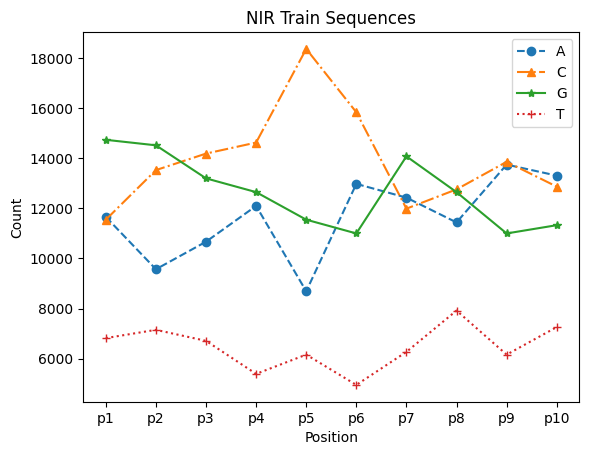

In [5]:
plt.plot(all_count["A"],marker="o",linestyle="--",label="A" )
plt.plot(all_count["C"],marker="^",linestyle="-.",label="C")
plt.plot(all_count["G"],marker="*",linestyle="solid",label="G")
plt.plot(all_count["T"],marker="+",linestyle="dotted",label="T")
plt.title("NIR Train Sequences")
plt.legend()
# plt.ylim(0,100)
plt.xticks([i for i in range(10)],['p1','p2','p3','p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
#plt.yticks(range(0,400,25))
plt.xlabel("Position")
plt.ylabel("Count")
plt.savefig("NIR Train.png", format='png')
#plt.savefig("linegraph.pdf", format='pdf')

In [6]:
print("Number of Green Sequences:", len(sequences))
print("Number of Green Sub-Sequences:", (len(sequences))*5)
print("A:", all_count["A"])
print("C:", all_count["C"])
print("T:", all_count["T"])
print("G:", all_count["G"])

Number of Green Sequences: 407
Number of Green Sub-Sequences: 2035
A: [11660.  9570. 10670. 12100.  8690. 12980. 12430. 11440. 13750. 13310.]
C: [11550. 13530. 14190. 14630. 18370. 15840. 11990. 12760. 13860. 12870.]
T: [6820. 7150. 6710. 5390. 6160. 4950. 6270. 7920. 6160. 7260.]
G: [14740. 14520. 13200. 12650. 11550. 11000. 14080. 12650. 11000. 11330.]


In [7]:
# Calculate the sums for each position
p = [sum(all_count[nucleotide][i] for nucleotide in "ACTG") for i in range(10)]

# Calculate the counts for each nucleotide
count_A = [all_count["A"][i] / p[i] for i in range(10)]
count_C = [all_count["C"][i] / p[i] for i in range(10)]
count_T = [all_count["T"][i] / p[i] for i in range(10)]
count_G = [all_count["G"][i] / p[i] for i in range(10)]


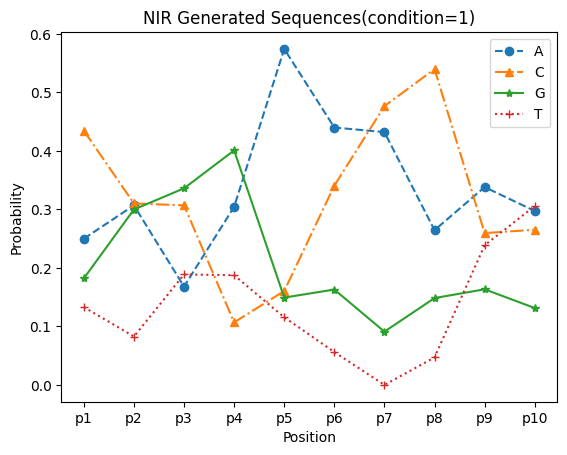

In [9]:
# plt.plot(count_A,marker="o",linestyle="--",label="A" )
# plt.plot(count_C,marker="^",linestyle="-.",label="C")
# plt.plot(count_G,marker="*",linestyle="solid",label="G")
# plt.plot(count_T,marker="+",linestyle="dotted",label="T")
# plt.title("NIR Generated Sequences(condition=1)")
# plt.legend()
# # plt.ylim(0,100)
# plt.xticks([i for i in range(10)],['p1','p2','p3','p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
# #plt.yticks(range(0,400,25))
# plt.xlabel("Position")
# plt.ylabel("Probability")
# plt.savefig("NIRc1_prob.png", format='png')
# #plt.savefig("linegraph1.pdf", format='pdf')

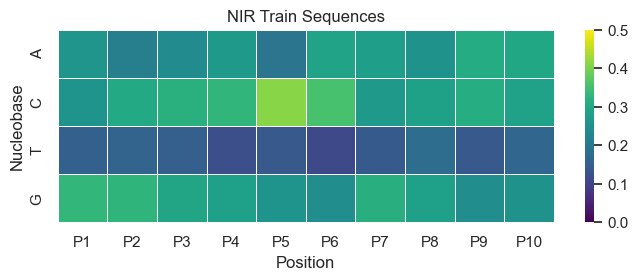

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_A = count_A
data_C = count_C
data_T = count_T
data_G = count_G

data = np.array([data_A, data_C, data_T, data_G])
nucleotides = ['A', 'C', 'T', 'G']
positions = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']


sns.set_theme()
plt.figure(figsize=(8, 2.5))


sns.heatmap(data, cmap="viridis", linewidths=0.5, xticklabels=positions, yticklabels=nucleotides, vmin=0, vmax=0.5)
plt.xlabel('Position')
plt.ylabel('Nucleobase')
plt.title('NIR Train Sequences')


#plt.savefig("p16nir.pdf", dpi=300, bbox_inches='tight', format='pdf')
plt.show()
plt.savefig("NIR Train-heatmap.png", format='png')
# plt.savefig("BrightNIR.pdf", bbox_inches='tight', format='pdf')

